# Chapter 2: Under the Hood of Generative AI
Figures and exercises for Chapter 2 of [Sustainable AI](https://www.oreilly.com/library/view/sustainable-ai/9781098155506/) by Raghavendra Selvan. 

**To run locally without errors, clone the entire repository:** 

``` git clone https://github.com/raghavian/sustainable_ai.git ```

### **Example 2-1.** Python code illustrating gradient descent algorithm for the temperature conversion model

At convergence: theta_0 = 32.12, theta_1 = 1.78


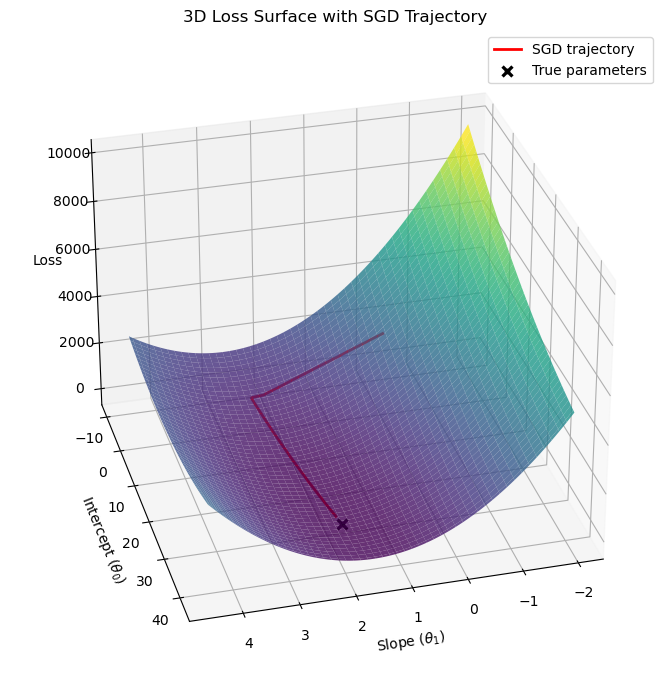

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ground truth parameters
true_w = 1.8
true_b = 32

# Generate data
np.random.seed(42)
celsius = np.random.uniform(-20, 40, size=100)
noise = np.random.normal(0, 2.0, size=100)
fahrenheit = true_w * celsius + true_b + noise

# Initialize model parameters
theta0 = np.random.randn()
theta1 = np.random.randn()

# Training config
lr = 0.001
epochs = 10000
trajectory = [(theta0, theta1)]

# Training loop
for _ in range(epochs):
    y_pred = theta0 + theta1 * celsius
    grad_theta0 = np.mean(2 * (y_pred - fahrenheit))
    grad_theta1 = np.mean(2 * (y_pred - fahrenheit) * celsius)
    theta0 -= lr * grad_theta0
    theta1 -= lr * grad_theta1
    trajectory.append((theta1, theta0))

print("At convergence: theta_0 = %.2f, theta_1 = %.2f"%(theta0,theta1))
trajectory = np.array(trajectory)

# Define bounds for grid based on trajectory
margin_w = 2.0
margin_b = 10.0

w = theta0
b = theta1
w_min, w_max = trajectory[:, 0].min() - margin_w, trajectory[:, 0].max() + margin_w
b_min, b_max = trajectory[:, 1].min() - margin_b, trajectory[:, 1].max() + margin_b

# Include true parameters
w_min = min(w_min, true_w - margin_w)
w_max = max(w_max, true_w + margin_w)
b_min = min(b_min, true_b - margin_b)
b_max = max(b_max, true_b + margin_b)

# Create grid
w_vals = np.linspace(w_min, w_max, 100)
b_vals = np.linspace(b_min, b_max, 100)
W, B = np.meshgrid(w_vals, b_vals)
Z = np.zeros_like(W)

# Compute loss surface
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred_grid = W[i, j] * celsius + B[i, j]
        Z[i, j] = np.mean((y_pred_grid - fahrenheit) ** 2)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

# Overlay SGD trajectory
loss_vals = [np.mean((w_t * celsius + b_t - fahrenheit) ** 2) for w_t, b_t in trajectory]
ax.plot(trajectory[:, 0], trajectory[:, 1], loss_vals, color='red', label='SGD trajectory',linewidth=2)

# Highlight true parameters
true_loss = np.mean((true_w * celsius + true_b - fahrenheit) ** 2)
ax.scatter(true_w, true_b, true_loss, color='black', s=120, marker='X', label='True parameters', edgecolor='white', linewidth=1.5)
ax.set_xlabel(r'Slope ($\theta_1$)')
ax.set_ylabel(r'Intercept ($\theta_0$)')
ax.set_zlabel('Loss')
ax.set_title('3D Loss Surface with SGD Trajectory')
ax.view_init(elev=30, azim=75)
ax.legend()
plt.tight_layout()
plt.show()


### **Figure 2-15.** Samples from the AerialNIST dataset used in this book. 

The AerialNIST dataset presented as part of this book’s dataset consists of randomly selected 60,000 images(to match MNIST statistics) from the original SAT-4 dataset. Of the total 60,000 image patches, 40,000 will be used for training, 10,000 for validation, and 10,000 for testing purposes. Each patch consists of three channels (RBG) with intensity values between [0-255]. Each patch has a label corresponding to four classes that could be of interest for airborne image classification for crop monitoring: {grassland, trees, barren, none}. The final none class contains all other types of terrain that cannot be categorized into
the first three categories.

AerialNIST has 60000 images


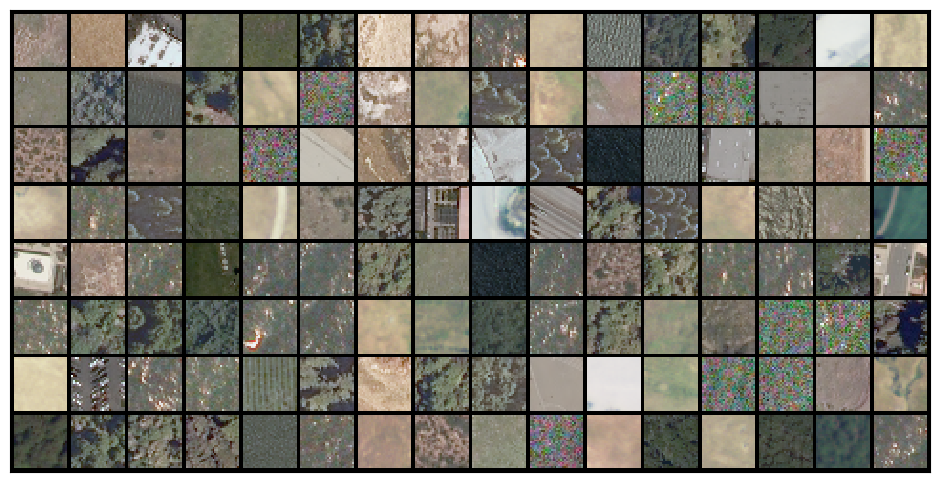

In [1]:
### Load the AerialNIST dataset class
from sustainableai.datasets import AerialNIST
from sustainableai.utils import show

### Create an instance of the dataset
dataset = AerialNIST()
classes = ['grassland','trees','barren','none']

N = len(dataset)

### Print the number of images
print('AerialNIST has %d images'%N)
K = 128

### Load a random set of images
img = [dataset[k][0] for k in range(K)]
labels = [dataset[k][1] for k in range(K)]

### Visualize the grid of images
from torchvision.utils import make_grid
grid = make_grid(img,nrow=16)
show(grid)

### **Figure 2-16.** Samples from the FAIRYTALES dataset consisting of about 388,000 characters, which can be used for training language models.
For language modeling tasks, we will use another toy dataset, FAIRYTALES, in this book. This has been curated from all the fairy tales written by Hans Christian Anderson. This resulted in a text file with 388,803 characters. 

In [2]:
import torch
from sustainableai.datasets import FAIRYTALES

### Instantiate the dataset 
dataset = FAIRYTALES()

### Sample some random lines
def sample_text(ds, k=10, seed=0):
    g = torch.Generator().manual_seed(seed)
    idx = torch.randperm(len(ds), generator=g)[:k].tolist()
    return [ds[i] for i in idx]

# Print random sentences from the dataset
samples = sample_text(dataset, k=20, seed=123)
for s in samples:
    print(s)


So Tommelise was obliged to work hard at the distaff, and the
surface of which danced mermen and mermaids to the melody of their own
And the chimney-sweeper and the little shepherdess looked imploringly at
returned to life again, and my
‘Farewell! farewell!’ cried the prince and princess. Little Gerda wept,
beautiful flowers and the bright sun! Tell me, dear grandmother, are
‘How very, very ugly she is!’ at last cried all the lady-chafers in


‘But if you take my voice from me,’ said the princess, ‘what have I left
of the horrid witches, but her resolution was as firm as her trust in
she took from the kitchen; there is plenty of bread there, and you must
tore her feather-dress into a hundred pieces, till the feathers flew
PART THE SECOND
And so the duckling was put to the proof for three weeks, but no eggs
children played at receiving company, instead of having as many cakes
her.
‘Give me my crown, and let me stand in the moonlight!’ said the
looked at the fragments, and thought and th